In [1]:
import anndata as ad
import scanpy as sc
import gc
import sys
import cellanova as cnova
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

seed = 10
np.random.seed(seed)

In [2]:
import scipy
def plot_batch_effect_cellanova(adata, cell_type_key, batch_key, condition_key, dataset_name):
    adata.raw = None
    print(dataset_name,"adata preprocessing...")

    import warnings
    warnings.filterwarnings("ignore")
    warnings.filterwarnings("ignore", category=FutureWarning)

    if isinstance(batch_key, str):
        batch_key = [batch_key]

    batch_all = []
    for i in range(adata.shape[0]):
        tmp = "__".join([adata.obs[batch_keyj][i] for batch_keyj in batch_key])
        batch_all.append(tmp)
    batch_all = np.array(batch_all)
    adata.obs["batch_all"] = batch_all
    adata.obs["batch_all"] = adata.obs["batch_all"].astype("category")
    print(dataset_name,"batch_all", np.unique(batch_all))

    batch_all_with_condition = []
    for i in range(adata.shape[0]):
        tmp = "__".join([adata.obs[batch_keyj][i] for batch_keyj in batch_key])
        tmp = tmp + "__" + adata.obs[condition_key][i]
        batch_all_with_condition.append(tmp)
    batch_all_with_condition = np.array(batch_all_with_condition)
    adata.obs["batch_all_with_condition"] = batch_all_with_condition
    adata.obs["batch_all_with_condition"] = adata.obs["batch_all_with_condition"].astype("category")
    print(dataset_name,"batch_all_with_condition", np.unique(batch_all_with_condition))

    batch_key.append("batch_all")
    batch_key.append("batch_all_with_condition")
    print(dataset_name,"Finish preprocessing")

    if isinstance(adata.X, scipy.sparse.spmatrix):
        adata.X = adata.X.toarray()
    
    print(dataset_name,"Original:",adata.X[:10,:10])
    print(dataset_name,"Denoised:",adata.layers['denoised'][:10,:10])
    
    integrated = ad.AnnData(adata.layers['denoised']-adata.X, dtype=np.float32)
    integrated.obs = adata.obs.copy()
    integrated.var_names = adata.var_names

    sc.pp.pca(integrated)
    sc.pp.neighbors(integrated, n_neighbors=15)
    sc.tl.umap(integrated)
    for colori in [cell_type_key, condition_key] + batch_key:
        sc.pl.umap(integrated, color=colori, ncols=1)

    print(dataset_name, "Within each unique condition, plot batch effect")
    unique_conditions = np.unique(np.array(integrated.obs[condition_key]))
    for conditioni in unique_conditions:
        print(dataset_name, "Now evaluating", conditioni, "denoised expression")
        integratedi = integrated[integrated.obs[condition_key] == conditioni]
        for colori in [cell_type_key] + batch_key:
            sc.pl.umap(integratedi, color=colori, ncols=1)
        print("-" * 20)

# ECCITE dataset

ECCITE adata preprocessing...
ECCITE batch_all ['rep1' 'rep2' 'rep3']
ECCITE batch_all_with_condition ['rep1__NT' 'rep1__Perturbed' 'rep2__NT' 'rep2__Perturbed' 'rep3__NT'
 'rep3__Perturbed']
ECCITE Finish preprocessing
ECCITE Original: [[-0.10192286 -0.08396872 -0.97589856 -0.09277633 -0.06480163 -0.1980169
  -0.1620977  -0.01437182 -0.14824481 -0.06805883]
 [-0.10192286 -0.08396872 -1.5088196  -0.09277633 -0.06480163 -0.1980169
  -0.1620977  -0.01437182 -0.14824481 -0.06805883]
 [-0.10192286 -0.08396872 -1.5088196  -0.09277633 -0.06480163 -0.1980169
  -0.1620977  -0.01437182 -0.14824481 -0.06805883]
 [-0.10192286 -0.08396872 -0.25156015 -0.09277633 -0.06480163 -0.1980169
  -0.1620977  -0.01437182 -0.14824481 -0.06805883]
 [-0.10192286 -0.08396872  0.9437418  -0.09277633 -0.06480163 -0.1980169
  -0.1620977  -0.01437182 -0.14824481 -0.06805883]
 [-0.10192286 -0.08396872  1.0509082  -0.09277633 -0.06480163 -0.1980169
  -0.1620977  -0.01437182 -0.14824481 -0.06805883]
 [-0.10192286  6.33

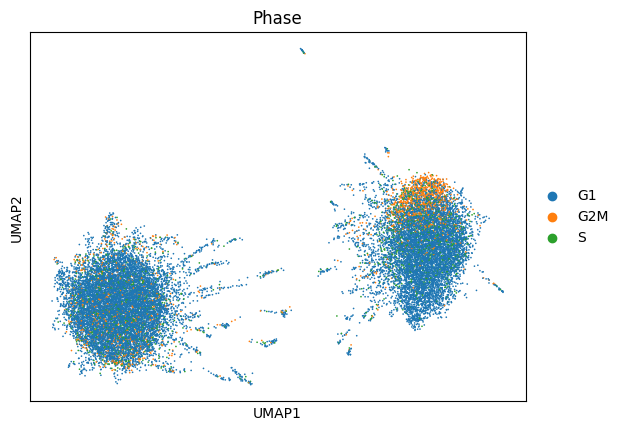

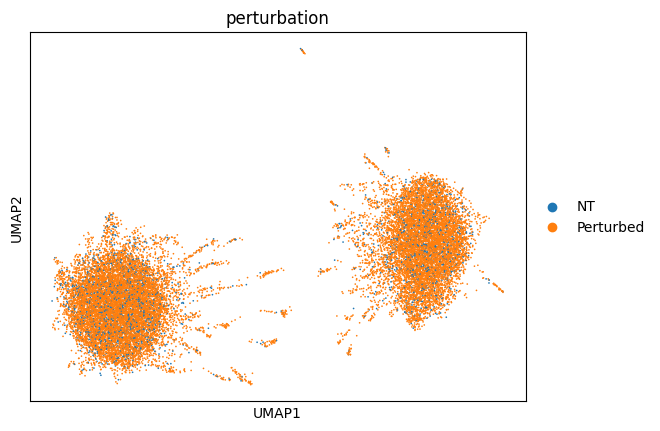

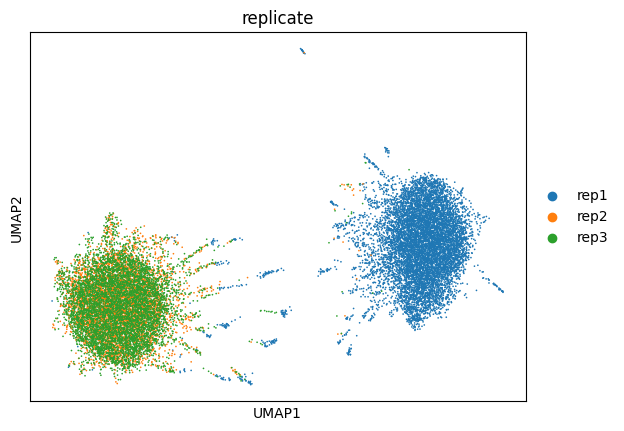

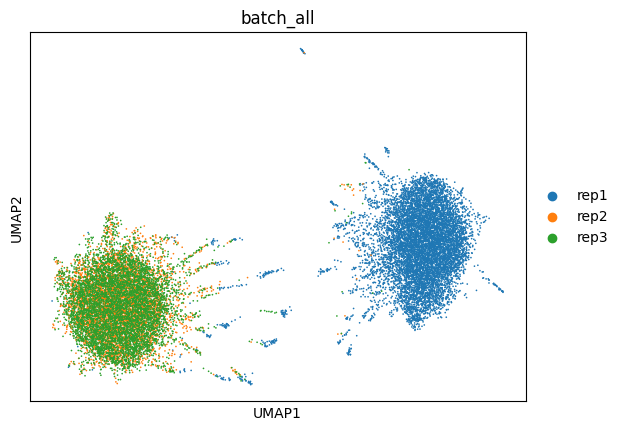

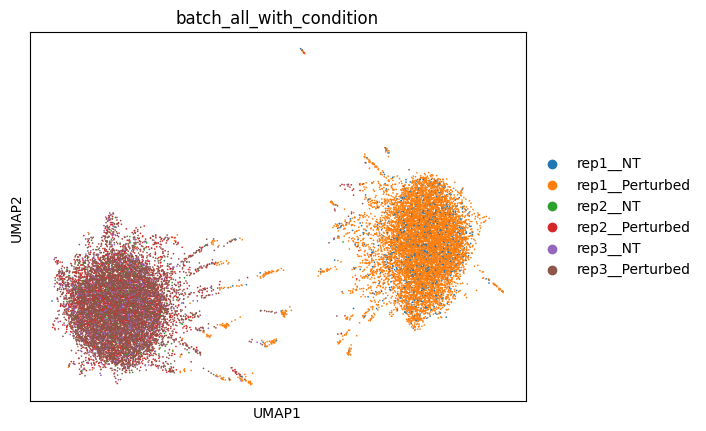

ECCITE Within each unique condition, plot batch effect
ECCITE Now evaluating NT denoised expression


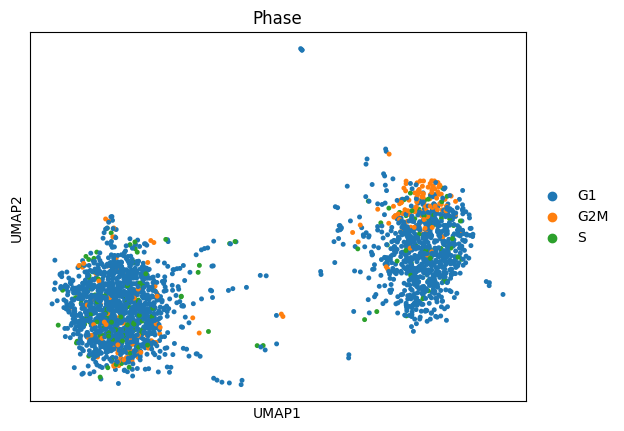

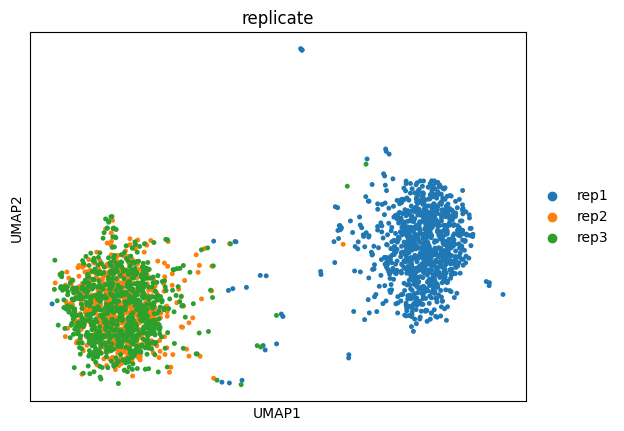

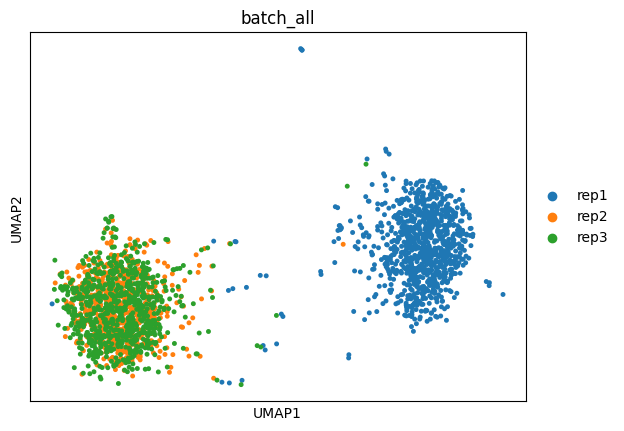

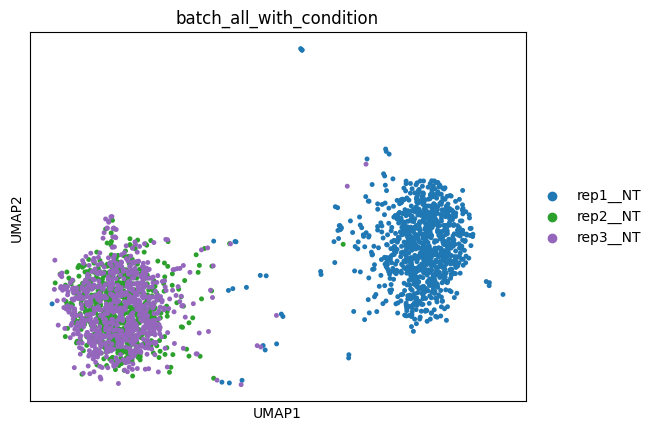

--------------------
ECCITE Now evaluating Perturbed denoised expression


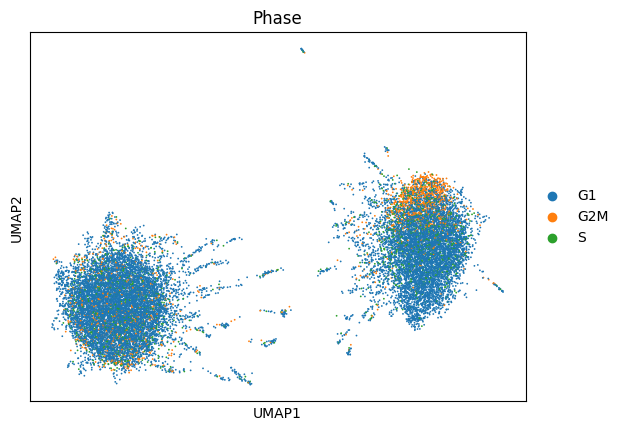

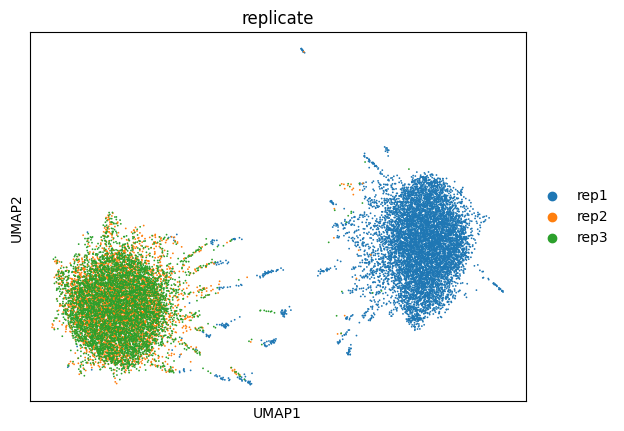

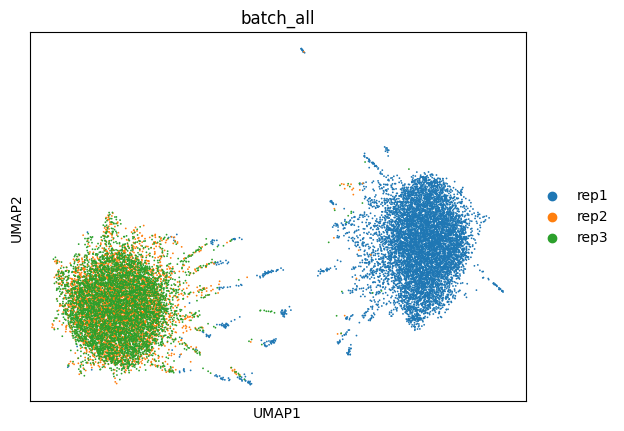

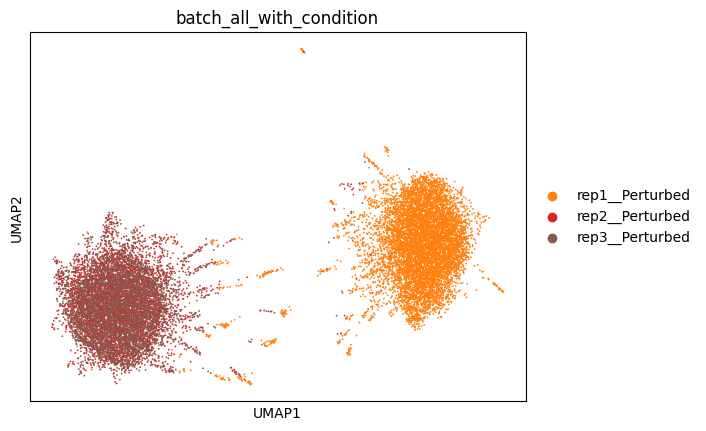

--------------------


In [3]:
# ECCITE
adata=sc.read_h5ad("./cellanova/" + "ECCITE" + "_results.h5ad")
plot_batch_effect_cellanova(adata=adata, cell_type_key="Phase", batch_key='replicate', condition_key='perturbation', dataset_name="ECCITE")

# ASD dataset

ASD1 adata preprocessing...
ASD1 batch_all ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '2' '3' '4' '5' '6' '7'
 '8' '9']
ASD1 batch_all_with_condition ['10__mutated' '10__nan' '11__mutated' '11__nan' '12__mutated' '12__nan'
 '13__mutated' '13__nan' '14__mutated' '14__nan' '15__mutated' '15__nan'
 '16__mutated' '16__nan' '17__mutated' '18__mutated' '18__nan'
 '1__mutated' '1__nan' '2__mutated' '2__nan' '3__mutated' '3__nan'
 '4__mutated' '4__nan' '5__mutated' '5__nan' '6__mutated' '6__nan'
 '7__mutated' '7__nan' '8__mutated' '8__nan' '9__mutated' '9__nan']
ASD1 Finish preprocessing
ASD1 Original: [[-0.04857025 -0.01385529 -0.109666   -0.47354846 -0.10377538 -0.37988474
  -0.0194566  -0.16386655 -0.08309978 -0.04131375]
 [-0.04857025 -0.01385529 -0.109666   -0.47354846 -0.10377538 -0.37988474
  -0.0194566  -0.16386655 -0.08309978 -0.04131375]
 [-0.04857025 -0.01385529 -0.109666   -0.47354846 -0.10377538 -0.37988474
  -0.0194566  -0.16386655 -0.08309978 -0.04131375]
 [-0.04857025 -0

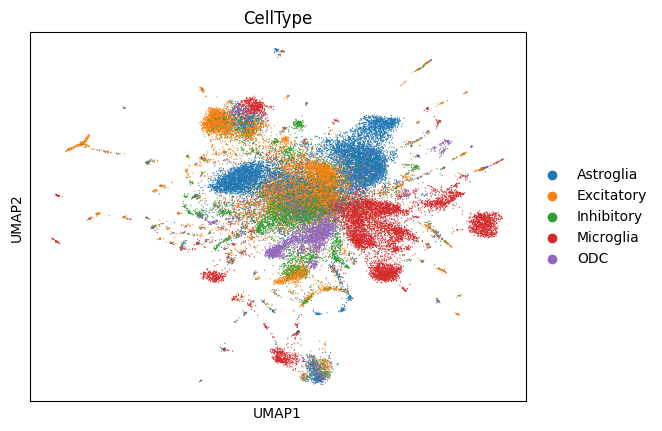

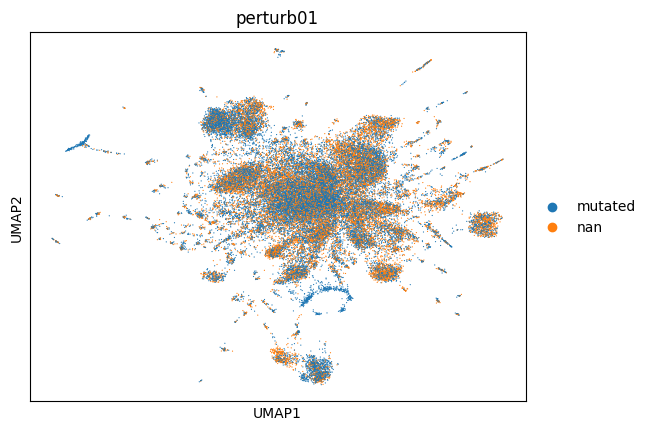

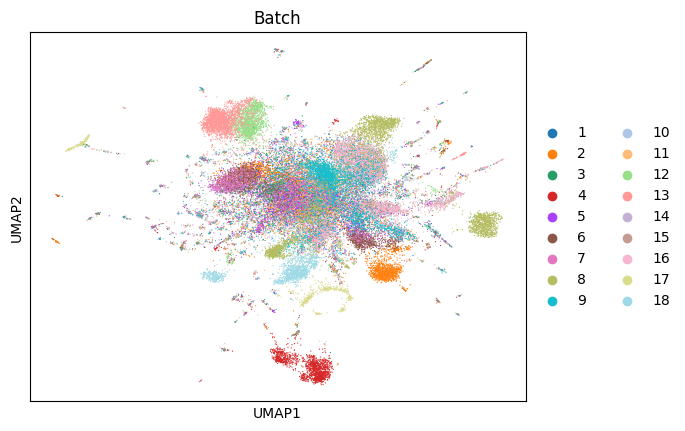

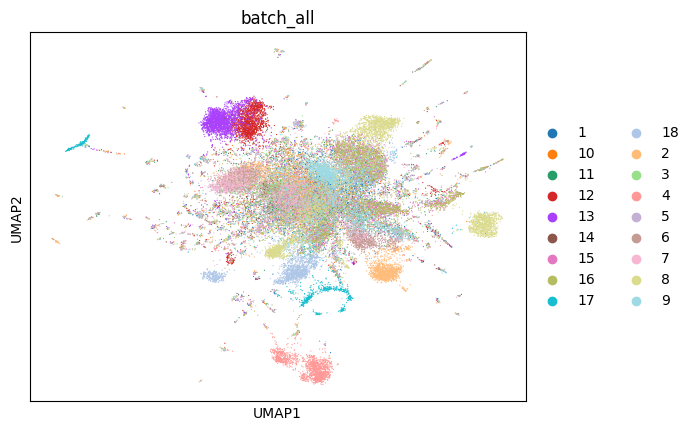

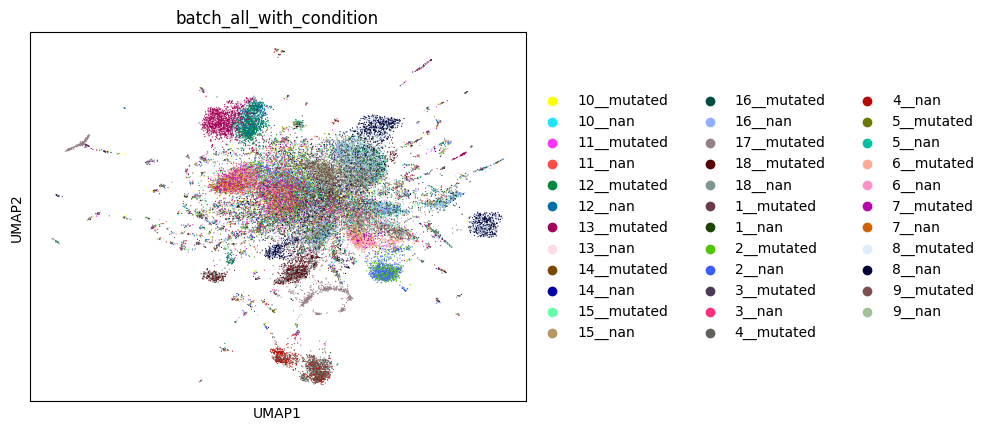

ASD1 Within each unique condition, plot batch effect
ASD1 Now evaluating mutated denoised expression


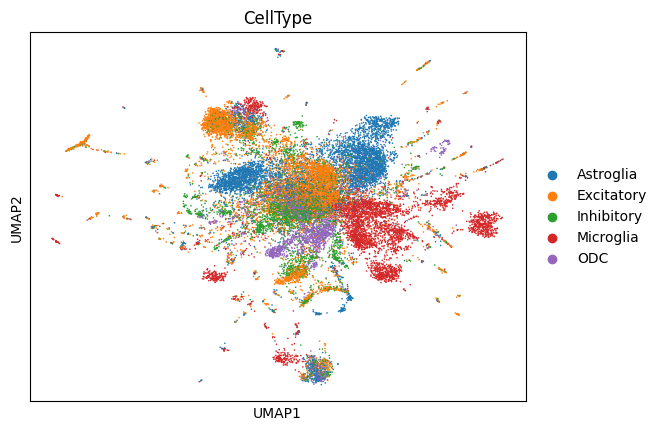

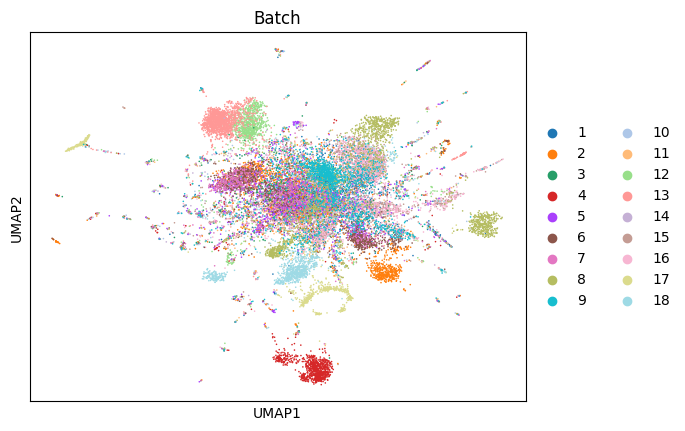

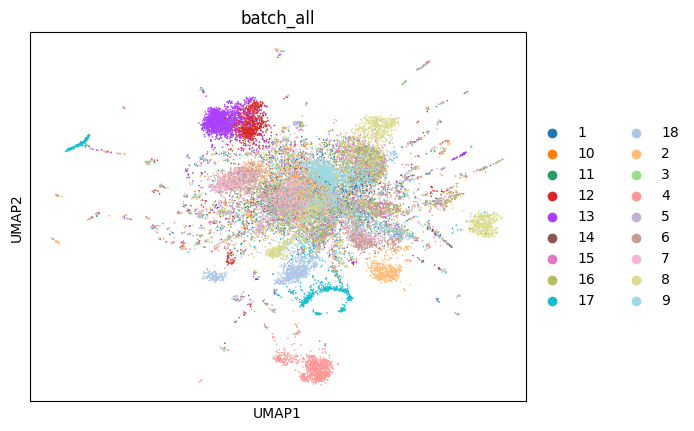

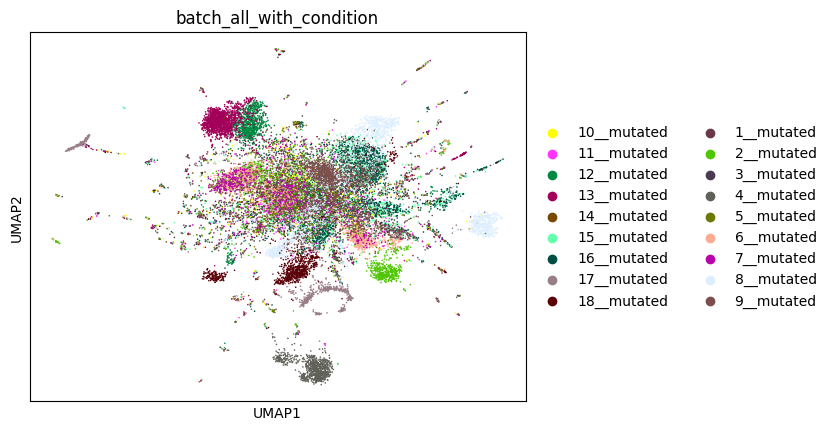

--------------------
ASD1 Now evaluating nan denoised expression


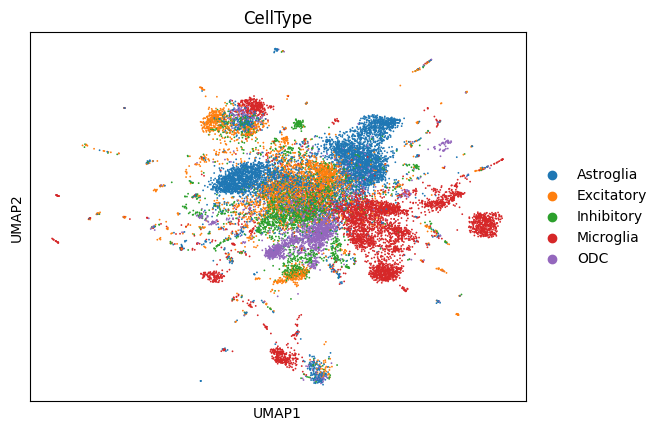

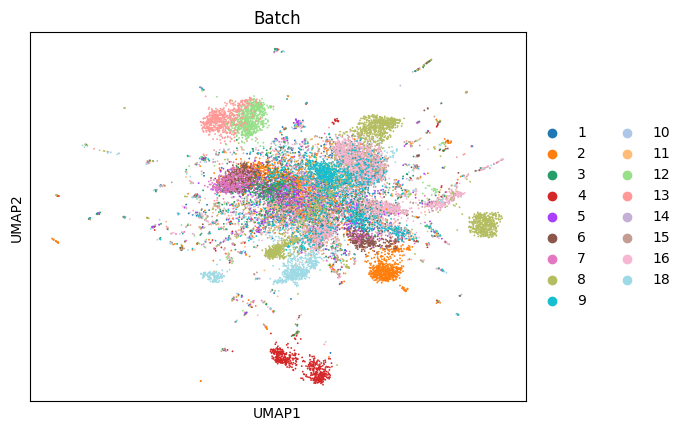

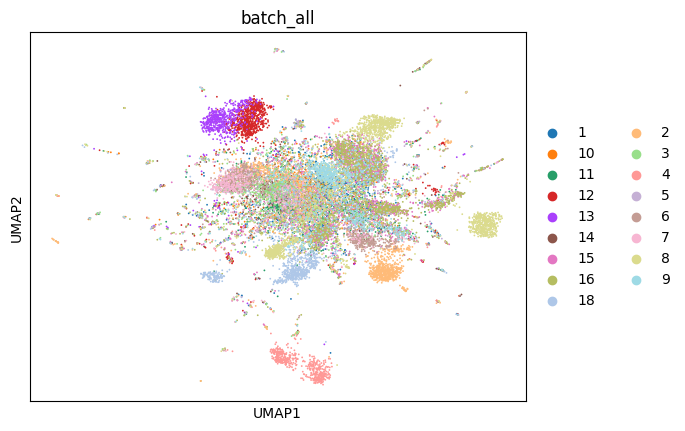

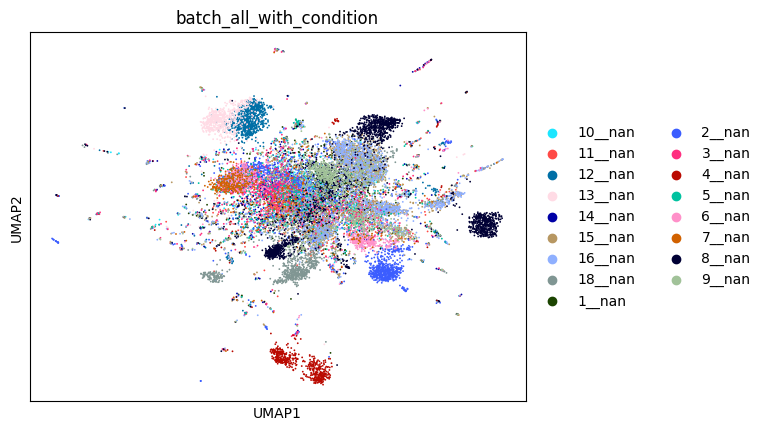

--------------------


In [4]:
# ASD1
adata=sc.read_h5ad("./cellanova/ASD1_results.h5ad")
plot_batch_effect_cellanova(adata=adata, cell_type_key="CellType", batch_key='Batch', condition_key='perturb01', dataset_name="ASD1")